In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
# Step 1- import data

points = np.genfromtxt('data.csv', delimiter=',')


In [10]:
# separate out data
x = points[:,0]
y = points[:,1]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

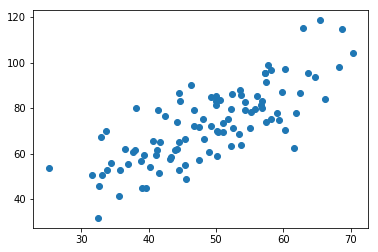

In [13]:
plt.scatter(x,y)
plt.show()

In [17]:
# randomly initialize weights and biases

slope = tf.Variable([1], dtype=tf.float32)
intercept = tf.Variable([0], dtype=tf.float32)


In [36]:
# define hyper parameter
rate = 0.000001
num_iterations = 1000

In [37]:
# define data placeholders

x_val = tf.placeholder(tf.float32)
y_val = tf.placeholder(tf.float32)

In [38]:
# define the model

predicted_y = slope*x_val + intercept

In [39]:
# find your error

error = tf.reduce_sum(tf.square(predicted_y - y_val))

In [40]:
# find grdient and update weights

optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)

# minimize the error
train = optimizer.minimize(error)

In [41]:
# initialize tf session

sess = tf.Session()

# initialize only the variables

init = tf.global_variables_initializer()

sess.run(init)

In [42]:
# train your model for certain number of iterations

for p in range(num_iterations):
    
    sess.run(train, feed_dict={x_val:x, y_val:y})

In [43]:
sess.run(slope)

array([ 1.47812736], dtype=float32)

In [44]:
sess.run(intercept)

array([ 0.06943748], dtype=float32)

In [45]:
def predict(m,b,x_vals):
    
    ys = []
    
    for i in range(len(x_vals)):
        
        predicted_y = m*x_vals[i]+b
        ys.append(predicted_y)
        
    return ys

In [46]:
final_predicted_slope = sess.run(slope)
final_predicted_intercept = sess.run(intercept)

In [47]:
final_predicted_intercept

array([ 0.06943748], dtype=float32)

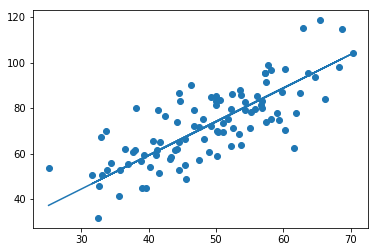

In [48]:
plt.scatter(x,y)
plt.plot(x, predict(final_predicted_slope, final_predicted_intercept,x))
plt.show()

In [50]:
predict(final_predicted_slope, final_predicted_intercept, [65])

[array([ 96.14771271], dtype=float32)]